# LAB 6

## Install, import, connect

In [18]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)


In [19]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

## import AI tools

In [20]:
! pip install jupyter-ai-magics[all] -q

In [21]:
import warnings
warnings.simplefilter('ignore')

In [22]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [23]:
%load_ext jupyter_ai_magics

The jupyter_ai_magics extension is already loaded. To reload it, use:
  %reload_ext jupyter_ai_magics


# Q1 - Population Growth Rate

In [7]:
sql = """
     select * from population
     where fips = '04'
     """

In [8]:
import pandas as pd

q1_df = pd.read_sql(sql, con=conn)
q1_df.head() #show the top 5 rows

,fips,pop,year
0,04,5829839,2005
1,04,6166318,2006
2,04,6338755,2007
3,04,6500180,2008
4,04,6595778,2009


In [9]:
%%ai gpt4 -f code
use the data in {q1_df} to visualze the growth rate of population

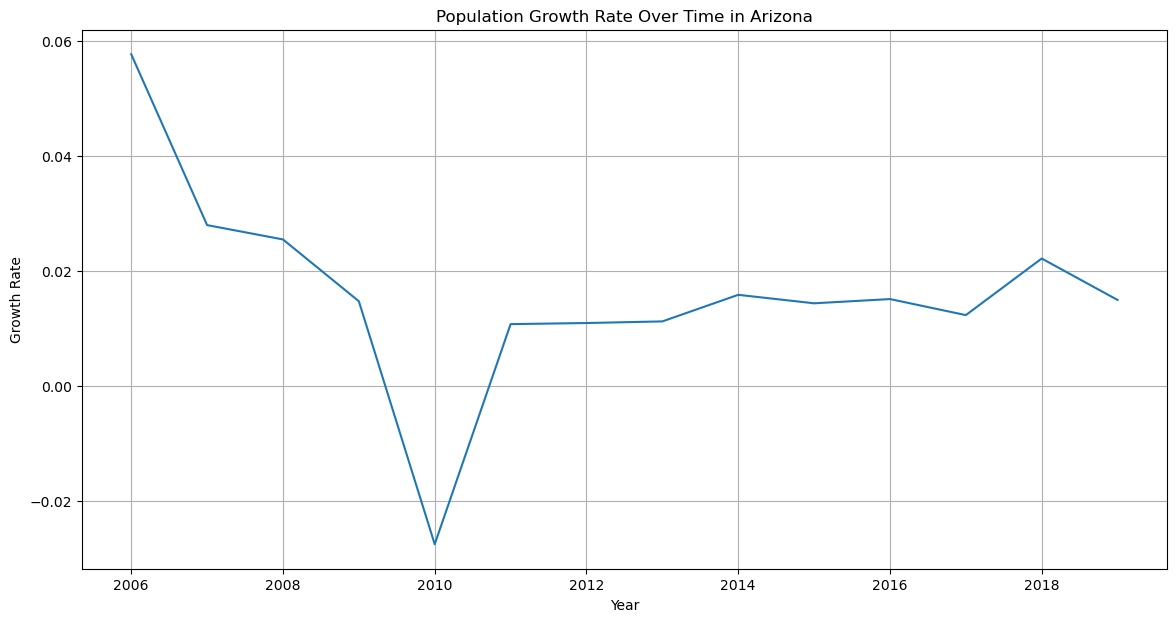

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'fips': ['04']*15,
    'pop': [5829839, 6166318, 6338755, 6500180, 6595778, 
            6413737, 6482505, 6553255, 6626624, 6731484, 
            6828065, 6931071, 7016270, 7171646, 7278717],
    'year': list(range(2005,2020))
}

df = pd.DataFrame(data)

df['growth_rate'] = df['pop'].pct_change()

plt.figure(figsize=(14,7))
plt.plot(df['year'], df['growth_rate'])
plt.title('Population Growth Rate Over Time in Arizona')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.grid(True)
plt.show()


### Markdown explanation for Q1:

This graph visualizes the annual population growth rate in Arizona using U.S. Census data from 2005 to 2019. The code constructs a DataFrame with population values for each year, calculates the year-over-year percentage change, and plots the resulting growth rate over time.
This visualization helps identify periods of acceleration or slowdown in population growth.


# Q2 - Income and Population Relationship

In [26]:
sql = """
     select * from income
     where fips = '04'
     """

In [27]:
q2_df = pd.read_sql(sql, con=conn)
q2_df.head() #show the top 5 rows

,fips,income,year
0,04,44282,2005
1,04,47265,2006
2,04,49889,2007
3,04,50958,2008
4,04,48745,2009


In [13]:
%%ai gpt4 -f code
 use the data in {q1_df} and {q2_df} to join the income and population tables for your state,
selecting values for all years.

In [ ]:
# Creating population dataframe
pop_data = {
    'fips': ['04', '04', '04', '04', '04', '04', '04', '04', '04', '04', '04', '04', '04', '04', '04'],
    'pop': [5829839, 6166318, 6338755, 6500180, 6595778, 6413737, 6482505, 6553255, 6626624, 6731484, 6828065, 6931071, 7016270, 7171646, 7278717],
    'year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
}

pop_df = pd.DataFrame(pop_data)

# Creating income dataframe
income_data = {
    'fips': ['04', '04', '04', '04', '04', '04', '04', '04', '04', '04', '04', '04', '04', '04', '04'],
    'income': [44282, 47265, 49889, 50958, 48745, 46789, 46709, 47826, 48510, 50068, 51492, 53558, 56581, 59246, 62055],
    'year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
}

income_df = pd.DataFrame(income_data)

# Merging the dataframes on 'year' and 'fips'
merged_df = pd.merge(pop_df, income_df, on=['year', 'fips'])
merged_df

In [14]:
import pandas as pd

# Provided datasets.
population_data = pd.DataFrame({
    'fips': ['04']*15,
    'pop': [5829839, 6166318, 6338755, 6500180, 6595778, 
            6413737, 6482505, 6553255, 6626624, 6731484, 
            6828065, 6931071, 7016270, 7171646, 7278717],
    'year': list(range(2005,2020))
})

income_data = pd.DataFrame({
    'fips': ['04']*15,
    'income': [44282, 47265, 49889, 50958, 48745, 46789, 
               46709, 47826, 48510, 50068, 51492, 53558, 
               56581, 59246, 62055],
    'year': list(range(2005, 2020))
})

# Join the tables.
result = pd.merge(population_data, income_data, on=["fips", "year"])

print(result)

   fips      pop  year  income
0    04  5829839  2005   44282
1    04  6166318  2006   47265
2    04  6338755  2007   49889
3    04  6500180  2008   50958
4    04  6595778  2009   48745
5    04  6413737  2010   46789
6    04  6482505  2011   46709
7    04  6553255  2012   47826
8    04  6626624  2013   48510
9    04  6731484  2014   50068
10   04  6828065  2015   51492
11   04  6931071  2016   53558
12   04  7016270  2017   56581
13   04  7171646  2018   59246
14   04  7278717  2019   62055


In [15]:
%%ai gpt4 -f code
use data in the past few lines of code to create a dual-axis chart with the following parameters: X-axis = year, Left Y-axis = population (line), Right Y-axis = median household income (bar or line, different color)

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color=color)
ax1.plot(merged_df['year'], merged_df['pop'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red' 
ax2.set_ylabel('Income', color=color)  # we already handled the x-label with ax1
ax2.plot(merged_df['year'], merged_df['income'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

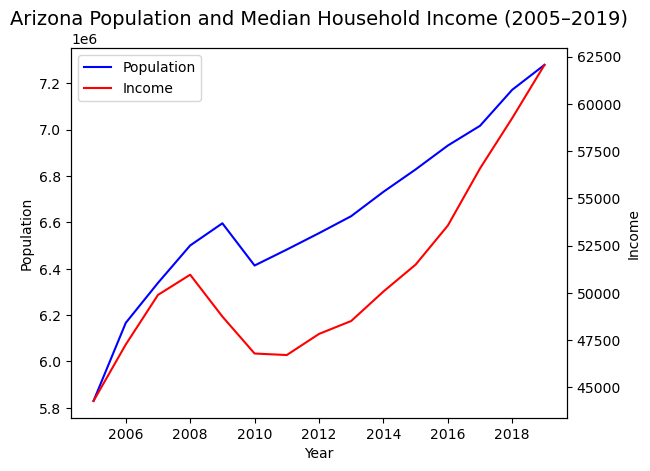

In [16]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots.
fig, ax1 = plt.subplots()

# Plot 'pop' column with respect to 'year' column.
pop = ax1.plot('year', 'pop', data = result, color='blue', label='Population')

# Create another Y-axis for the same plot.
ax2 = ax1.twinx()

# Plot 'income' column with respect to 'year' column.
income = ax2.plot('year', 'income', data = result, color='red', label='Income')

# Adding legends for both plots.
lines = pop + income
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=0)

# Adding labels for both Y-axis.
ax1.set_ylabel('Population')
ax2.set_ylabel('Income')

# Adding labels for X-axis.
ax1.set_xlabel('Year')

plt.title('Arizona Population and Median Household Income (2005–2019)', fontsize=14)

# Display the plot.
plt.show()

### Markdown Q2: How do population and income trends compare? 

This graph compares Arizona’s population growth with changes in median household income over a 15-year span. Both metrics show an overall upward trend, but at different rates and with distinct fluctuations.
 
Population increased steadily year over year, with only one minor dip around 2009, reflecting consistent demographic growth. Median income also rose over time, but with more of a drop during and after the 2008 financial crisis, where income briefly declined before recovering. While both trends are generally positive, income growth lagged behind population growth in several years.


# Q3 - Student-Defined Question

### Did income growth ever outpace population growth in Arizona, and during which years was this most pronounced?

In [29]:
%%ai gpt4 -f code
Using Arizona population and median income data from 2005 to 2019 from data in {q1_df}, write Python code to plot year-over-year percent change for both variables on the same chart. Use pandas to calculate the percent change and matplotlib to visualize the trends. I want to compare whether income growth ever outpaced population growth

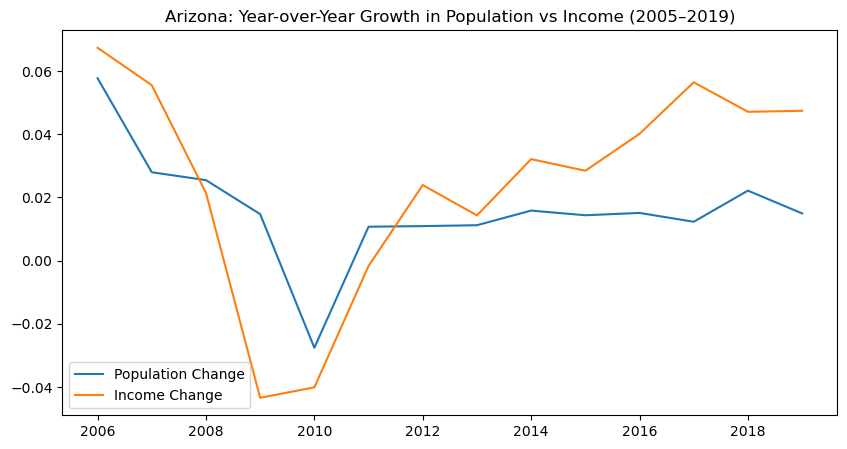

In [32]:
pop_data = {'fips': ['04']*15,
             'pop': [5829839, 6166318, 6338755, 6500180, 6595778, 6413737, 6482505, 6553255, 6626624, 6731484, 6828065, 6931071, 7016270, 7171646, 7278717],
             'year': list(range(2005,2020))}

pop_df = pd.DataFrame(pop_data)

income_data = {'fips': ['04']*15,
               'income': [44282, 47265, 49889, 50958, 48745, 46789, 46709, 47826, 48510, 50068, 51492, 53558, 56581, 59246, 62055],
               'year': list(range(2005,2020))}

income_df = pd.DataFrame(income_data)

merged_df = pd.merge(pop_df, income_df, on=['year', 'fips'])

merged_df['pop_change'] = merged_df['pop'].pct_change()
merged_df['income_change'] = merged_df['income'].pct_change()

plt.figure(figsize=(10,5))
plt.plot(merged_df['year'], merged_df['pop_change'], label='Population Change')
plt.plot(merged_df['year'], merged_df['income_change'], label='Income Change')
plt.legend()
plt.title('Arizona: Year-over-Year Growth in Population vs Income (2005–2019)')
plt.show()

### Q3 Markdown: 

### Q3: Median Income vs. Population Growth Rate in Arizona (2005–2019)

This graph compares Arizona’s median household income with its annual population growth rate. By plotting income alongside the percentage change in population, it reveals how economic conditions may relate to demographic expansion.
 
While median income generally increased over time, population growth rates fluctuated more noticeably. Notably, during the late 2000s recession, income dipped while population growth slowed—suggesting economic hardship may have tempered migration or birth rates. In later years, income rebounded steadily, but growth rates remained low and stagnant, indicating that rising income did not necessarily accelerate population expansion. Overall, the trends show partial alignment but with some disconnect, highlighting that income gains alone don’t fully explain population dynamics.
